# Predictive modelling exercise on 2014 Road Safety.
Vikum Wijesinghe
## Introduction
The main task of this exercise was to build a model that predicts whether a police officer in the UK will attend the scene of a car accident using car accidents’data available in the dara.gov repository

In [716]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

# Load Data

In [717]:
data_directory="../input/roadsafety-accidents/"
csv_file="DfTRoadSafety_Accidents_2014.csv"

#load data to pandas dataframe 
frame=pd.read_csv(data_directory + csv_file)

# EDA

In [718]:
print ("Number of rows %d and columns %d " % (frame.shape[0],frame.shape[1] ))
#number of rows 146322 and columns 32
 
#put column namea into a list for later usage
colnames=list(frame.columns.values)
print ("Columns : "+ str(colnames))

Number of rows 146322 and columns 32 
Columns : ['Accident_Index', 'Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude', 'Latitude', 'Police_Force', 'Accident_Severity', 'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week', 'Time', 'Local_Authority_(District)', 'Local_Authority_(Highway)', '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit', 'Junction_Detail', 'Junction_Control', '2nd_Road_Class', '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control', 'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions', 'Weather_Conditions', 'Road_Surface_Conditions', 'Special_Conditions_at_Site', 'Carriageway_Hazards', 'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident', 'LSOA_of_Accident_Location']


In [719]:
# have a look
frame.head(10)

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,201401BS70001,524600,179020,-0.206443,51.496345,1,3,2,1,09/01/2014,5,13:21,12,E09000020,3,315,6,30,0,-1,-1,0,0,0,1,2,2,0,0,1,2,E01002814
1,201401BS70002,525780,178290,-0.189713,51.489523,1,3,2,1,20/01/2014,2,23:00,12,E09000020,3,3218,6,30,5,4,3,3220,0,5,7,1,1,0,0,1,2,E01002894
2,201401BS70003,526880,178430,-0.173827,51.490536,1,3,2,1,21/01/2014,3,10:40,12,E09000020,3,308,6,30,3,4,6,0,0,0,1,1,1,0,0,1,1,E01002822
3,201401BS70004,525580,179080,-0.192311,51.496668,1,3,1,1,15/01/2014,4,17:45,12,E09000020,5,0,6,30,3,4,6,0,0,1,4,1,1,0,0,1,2,E01002812
4,201401BS70006,527040,179030,-0.171308,51.495892,1,3,2,1,09/01/2014,5,08:50,12,E09000020,3,4,6,30,7,4,3,4,0,8,1,1,1,0,0,1,1,E01002821
5,201401BS70008,524750,178970,-0.204301,51.495863,1,3,3,1,17/01/2014,6,14:11,12,E09000020,3,3220,2,30,0,-1,-1,0,0,0,1,1,1,0,0,1,1,E01002814
6,201401BS70009,524950,179240,-0.201326,51.498245,1,3,2,1,10/01/2014,6,18:25,12,E09000020,3,315,6,30,3,4,6,0,0,0,4,1,2,0,0,1,1,E01002817
7,201401BS70010,523850,181450,-0.216389,51.518349,1,3,2,1,30/01/2014,5,17:50,12,E09000020,4,412,1,30,1,4,6,0,0,8,4,2,2,0,0,1,1,E01002909
8,201401BS70011,524500,180260,-0.207445,51.507511,1,3,2,1,10/01/2014,6,10:55,12,E09000020,5,0,6,30,6,4,6,0,0,0,1,1,1,0,0,1,1,E01002871
9,201401BS70013,526450,179230,-0.179731,51.497822,1,3,2,1,05/01/2014,1,20:26,12,E09000020,5,0,6,30,3,4,5,0,0,0,4,2,2,0,0,1,1,E01002892


In [720]:
frame.describe()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident
count,146322.000000,1.463220e+05,146322.000000,146322.000000,146322.000000,146322.000000,146322.000000,146322.000000,146322.00000,146322.000000,146322.000000,146322.000000,146322.000000,146322.000000,146322.000000,146322.000000,146322.000000,146322.000000,146322.000000,146322.000000,146322.000000,146322.000000,146322.000000,146322.000000,146322.000000,146322.000000,146322.000000
mean,447029.362475,2.903741e+05,-1.328712,52.500882,29.895839,2.836033,1.835179,1.329103,4.09868,343.380537,4.077083,1002.119592,5.160796,38.238611,2.333354,1.853200,2.810234,377.446023,0.008386,0.857725,1.924099,1.500595,1.328132,0.096985,0.069135,1.341951,1.182577
std,95158.326674,1.578227e+05,1.397358,1.421337,25.190838,0.399682,0.700208,0.857469,1.91668,258.280727,1.417408,1791.325195,1.644357,13.850167,2.498027,2.339494,3.193163,1288.061037,0.119877,1.947539,1.627001,1.514131,0.568551,0.685515,0.612831,0.474365,0.386320
min,70951.000000,1.030400e+04,-7.450342,49.913077,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,0.000000,1.000000,20.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,1.000000,1.000000
25%,384364.250000,1.765900e+05,-2.235527,51.474928,6.000000,3.000000,1.000000,1.000000,2.00000,104.000000,3.000000,0.000000,6.000000,30.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
50%,451306.000000,2.416200e+05,-1.238819,52.055123,30.000000,3.000000,2.000000,1.000000,4.00000,323.000000,3.000000,146.000000,6.000000,30.000000,3.000000,4.000000,4.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
75%,526830.000000,3.911760e+05,-0.170586,53.414623,45.000000,3.000000,2.000000,1.000000,6.00000,517.000000,6.000000,762.000000,6.000000,40.000000,3.000000,4.000000,6.000000,0.000000,0.000000,0.000000,4.000000,1.000000,2.000000,0.000000,0.000000,2.000000,1.000000
max,655309.000000,1.190858e+06,1.758797,60.597984,98.000000,3.000000,21.000000,93.000000,7.00000,941.000000,6.000000,9999.000000,9.000000,70.000000,9.000000,4.000000,6.000000,9999.000000,2.000000,8.000000,7.000000,9.000000,5.000000,7.000000,7.000000,2.000000,2.000000


## Analysis for the target variable = 'Did_Police_Officer_Attend_Scene_of_Accident'
* Most cases (81.7%) were attended by an police officer.
* not attended scenario was labled as 2 in the original dataset, converting this to 0 makes sense and probablities can be easily calculated.


In [721]:
#look at distribution of target variable
target="Did_Police_Officer_Attend_Scene_of_Accident"

print ("Any null values in the target?: {}".format(str(frame[target].isnull().any())))

unique_vales=frame[target].unique()
print (unique_vales)

Any null values in the target?: False
[2 1]


Lets convert 2 -> 0, it makes sense more and probablities can be easily calculated. 

In [722]:
# convert 2 --> 0
frame[target].replace([2],[0],inplace=True)
unique_vales=frame[target].unique()
print (unique_vales)

[0 1]


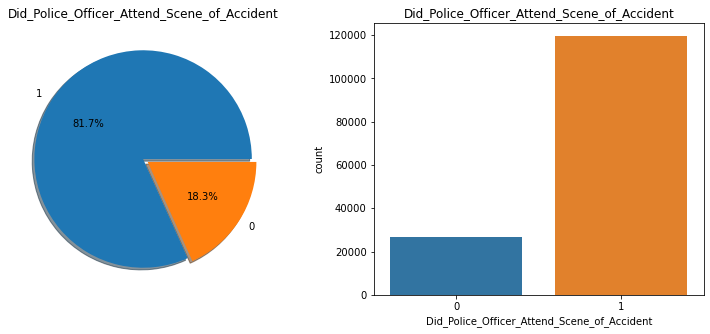

In [723]:
f,ax=plt.subplots(1,2,figsize=(13,5))
frame[target].value_counts().plot.pie(explode=[0,0.05],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title(target)
ax[0].set_ylabel('')
sns.countplot(target,data=frame,ax=ax[1])
ax[1].set_title(target)
plt.show()

## Investigating missing values

* Missing values are replaced by a magic value -1. This is not very good lets replace them again with nan and visualize.

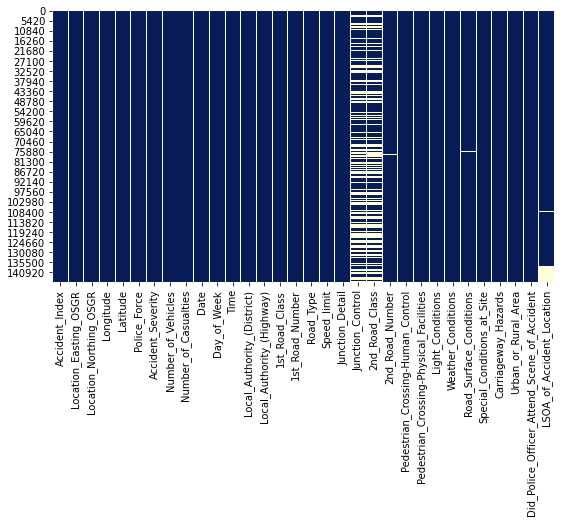

In [724]:
tempCols = ['Junction_Control','2nd_Road_Class','2nd_Road_Number','Road_Surface_Conditions','Special_Conditions_at_Site','Carriageway_Hazards']

for col in tempCols:
    frame[col].replace([-1],[np.nan],inplace=True)

fig, ax = plt.subplots(figsize=(9,5))
sns.heatmap(frame.isnull(), cbar=False, cmap="YlGnBu_r")
plt.show()

In [725]:
total = frame.isnull().sum().sort_values(ascending = False)
percent = round(frame.isnull().sum().sort_values(ascending = False)/len(frame)*100, 2)
temp = pd.concat([total, percent], axis = 1,keys= ['Missing Total', 'Missing Percentage %'])
temp

,Missing Total,Missing Percentage %
2nd_Road_Class,56998,38.95
Junction_Control,56467,38.59
LSOA_of_Accident_Location,9277,6.34
2nd_Road_Number,616,0.42
Road_Surface_Conditions,222,0.15
Carriageway_Hazards,1,0.00
Special_Conditions_at_Site,1,0.00
Day_of_Week,0,0.00
Date,0,0.00
Number_of_Casualties,0,0.00


both features 2nd_Road_Class and Junction_Control have over 38% of missing values. hence those features will be dropped.

In [726]:
# drop '2nd_Road_Class','Junction_Control'
frame.drop(['2nd_Road_Class','Junction_Control'],axis=1, inplace=True)

# fill others with mode for now.
tempcols = ['LSOA_of_Accident_Location','2nd_Road_Number','Road_Surface_Conditions','Special_Conditions_at_Site','Carriageway_Hazards']
for col in tempcols:
    frame[col].fillna(frame[col].mode()[0], inplace=True)

#print(frame.isnull().any())

## Investigating unique values in each feature

In [727]:
# see how many unique values each field has, to get a feeling for which fields needs to be
#strictly treated as numerical or categorical

for index,column_name in enumerate(frame.columns.values): # for each column in the frame
    unqiue_values_of_col_x=frame[column_name].unique() # retrieve unique values as an array
    print (" field %s with index %d has %d unique values " % (column_name,index, len(unqiue_values_of_col_x) ))

 field Accident_Index with index 0 has 146322 unique values 
 field Location_Easting_OSGR with index 1 has 92575 unique values 
 field Location_Northing_OSGR with index 2 has 96296 unique values 
 field Longitude with index 3 has 138878 unique values 
 field Latitude with index 4 has 137376 unique values 
 field Police_Force with index 5 has 51 unique values 
 field Accident_Severity with index 6 has 3 unique values 
 field Number_of_Vehicles with index 7 has 14 unique values 
 field Number_of_Casualties with index 8 has 26 unique values 
 field Date with index 9 has 365 unique values 
 field Day_of_Week with index 10 has 7 unique values 
 field Time with index 11 has 1439 unique values 
 field Local_Authority_(District) with index 12 has 380 unique values 
 field Local_Authority_(Highway) with index 13 has 207 unique values 
 field 1st_Road_Class with index 14 has 6 unique values 
 field 1st_Road_Number with index 15 has 4384 unique values 
 field Road_Type with index 16 has 6 unique 

Features can be broadly categorized in to two : features with <=100 unique values & features with > 100 unique values

## Analyzing relation of categorical features(low cardinality ) with target

                  mean  count
Police_Force                 
1             0.825481  25682
3             0.763064   1397
4             1.000000   3879
5             0.814906   2831
6             0.875874   4004
7             0.793865   2673
10            0.743277   3198
11            0.731884   1242
12            0.818762   2036
13            0.805473   5043
14            0.831124   3168
16            0.748234   2689
17            0.759280    889
20            0.735320   5603
21            0.817792   2799
22            0.783412   2327
23            0.857834   1653
30            0.745833   2400
31            0.744097   2880
32            0.836372   2194
33            0.839855   2479
34            0.821676   1301
35            0.784773   2049
36            0.849628   1882
37            0.864850   1761
40            0.803424   1577
41            0.809795   2634
42            0.832402   4117
43            0.821330   5429
44            0.813342   4527
45            0.821050   3962
46        

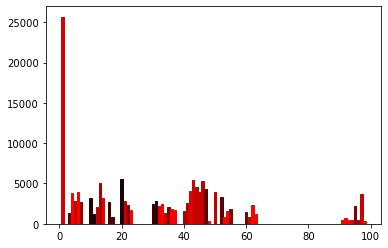

                       mean   count
Accident_Severity                  
1                  0.987937    1658
2                  0.906123   20676
3                  0.800352  123988


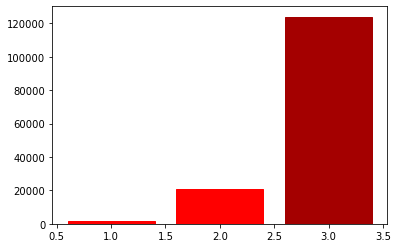

                        mean  count
Number_of_Vehicles                 
1                   0.831160  43171
2                   0.792013  88592
3                   0.920205  11329
4                   0.963450   2435
5                   0.990619    533
6                   0.993631    157
7                   1.000000     54
8                   0.969697     33
9                   1.000000      8
10                  1.000000      6
11                  1.000000      1
13                  1.000000      1
19                  1.000000      1
21                  1.000000      1


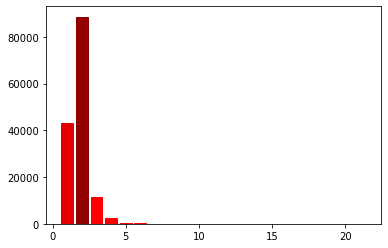

                 mean  count
Day_of_Week                 
1            0.852070  15940
2            0.812023  21093
3            0.804104  22318
4            0.801891  22210
5            0.810744  21780
6            0.814649  23960
7            0.839283  19021


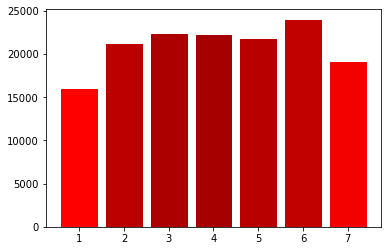

                    mean  count
1st_Road_Class                 
1               0.925848   5246
2               0.921875    384
3               0.837471  67828
4               0.824799  18573
5               0.816485  12969
6               0.766759  41322


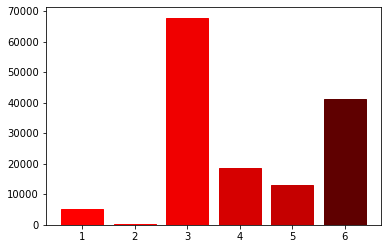

               mean   count
Road_Type                  
1          0.745571   10329
2          0.730835    2935
3          0.872065   20823
6          0.816793  110187
7          0.833982    1542
9          0.624506     506


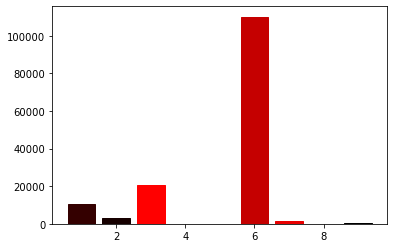

                 mean  count
Speed_limit                 
20           0.713283   3418
30           0.777782  94997
40           0.856287  12017
50           0.911851   5797
60           0.916966  20016
70           0.928054  10077


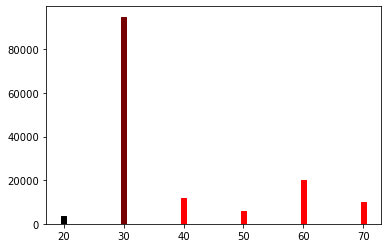

                     mean  count
Junction_Detail                 
0                0.836926  56410
1                0.735607  13253
2                0.765337   1956
3                0.810743  48014
5                0.885948   2078
6                0.840943  14586
7                0.816126   1017
8                0.800272   5883
9                0.824960   3125


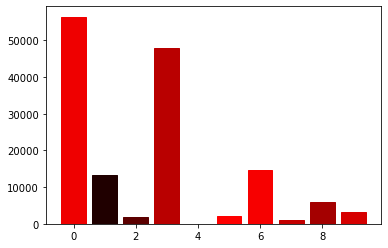

                                       mean   count
Pedestrian_Crossing-Human_Control                  
0                                  0.817573  145538
1                                  0.765396     341
2                                  0.808126     443


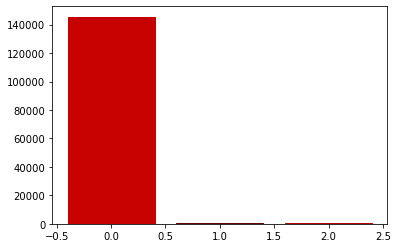

                                             mean   count
Pedestrian_Crossing-Physical_Facilities                  
0                                        0.823018  118108
1                                        0.755477    4519
4                                        0.786301    8526
5                                        0.804751   11324
7                                        0.795591     499
8                                        0.829050    3346


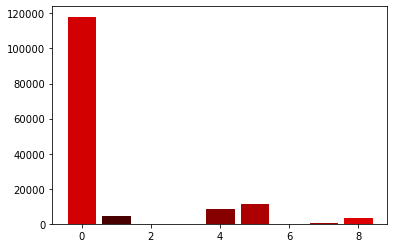

                      mean   count
Light_Conditions                  
1                 0.807090  108071
4                 0.835917   28449
5                 0.861239     872
6                 0.941797    7199
7                 0.619295    1731


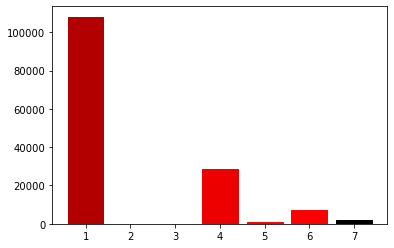

                        mean   count
Weather_Conditions                  
1                   0.817546  118879
2                   0.857345   17665
3                   0.845815     227
4                   0.863492    1575
5                   0.873553    2333
6                   0.858974      78
7                   0.885790     753
8                   0.816895    2332
9                   0.420968    2480


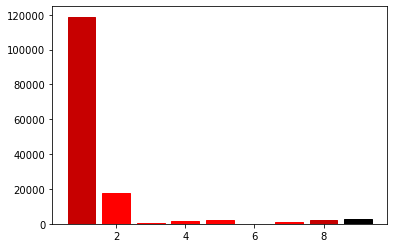

                             mean   count
Road_Surface_Conditions                  
1.0                      0.796989  102241
2.0                      0.862646   41921
3.0                      0.825243     206
4.0                      0.912530    1692
5.0                      0.935115     262


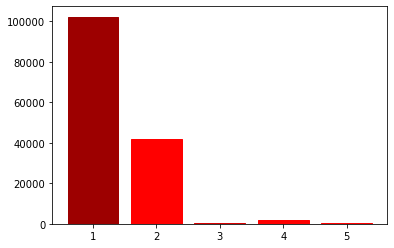

                                mean   count
Special_Conditions_at_Site                  
0.0                         0.816353  143117
1.0                         0.853881     219
2.0                         0.944444      54
3.0                         0.917874     207
4.0                         0.834827    1562
5.0                         0.889785     372
6.0                         0.907731     401
7.0                         0.887179     390


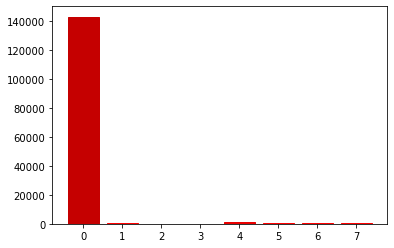

                         mean   count
Carriageway_Hazards                  
0.0                  0.816712  143910
1.0                  0.825503     149
2.0                  0.862620     939
3.0                  0.928571     182
6.0                  0.786667     450
7.0                  0.893064     692


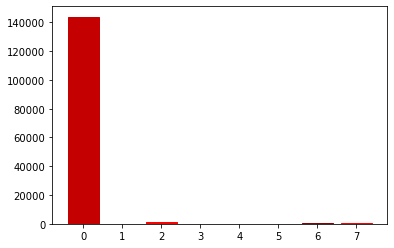

                         mean  count
Urban_or_Rural_Area                 
1                    0.783813  96287
2                    0.882103  50035


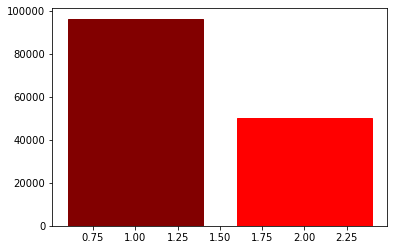

In [728]:
# I will examine a handfull with small number of unique classes < =100

few_unique_values=["Police_Force","Accident_Severity","Number_of_Vehicles","Day_of_Week","1st_Road_Class","Road_Type",
"Speed_limit","Junction_Detail","Pedestrian_Crossing-Human_Control",
"Pedestrian_Crossing-Physical_Facilities","Light_Conditions","Weather_Conditions","Road_Surface_Conditions",
"Special_Conditions_at_Site","Carriageway_Hazards","Urban_or_Rural_Area"]

for index,column_name in enumerate(few_unique_values): # for each column in the frame
    #print (" field %s  has %d unique values " % (column_name ))
    aggregate_frame=frame[target].groupby(frame[column_name]).agg(['mean', 'count'])
    print(aggregate_frame)

    barlist=plt.bar(aggregate_frame.index.values, aggregate_frame['count'].values)
    for i in range (0,len(aggregate_frame.index.values)):
        barlist[i].set_color([max(0,min(1,(aggregate_frame['mean'].iloc[i]-0.72)*8)),max(0,min(1,(1-aggregate_frame['mean'].iloc[i]-0.72)*8)),0.0]) # this parts tries to link probability to visit with color (e.g. more red --> higher probability)
    plt.show()

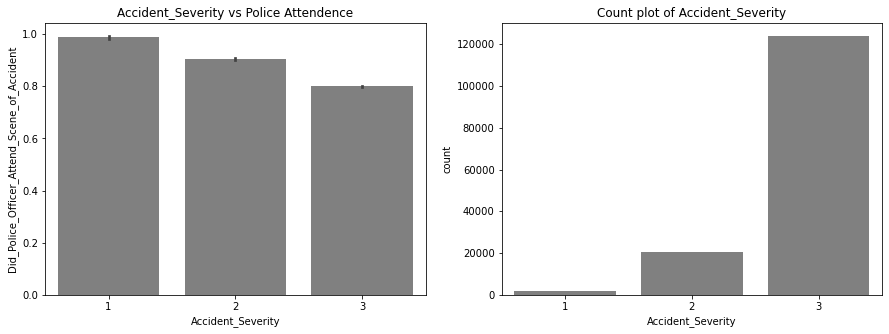

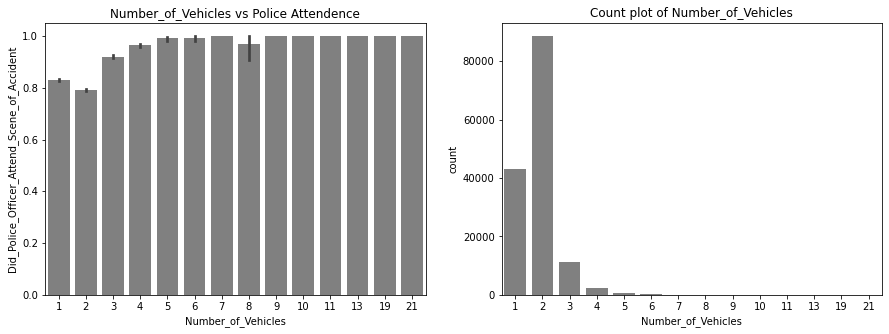

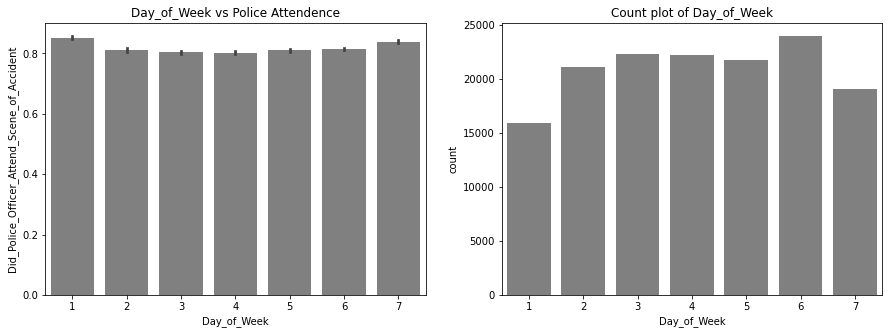

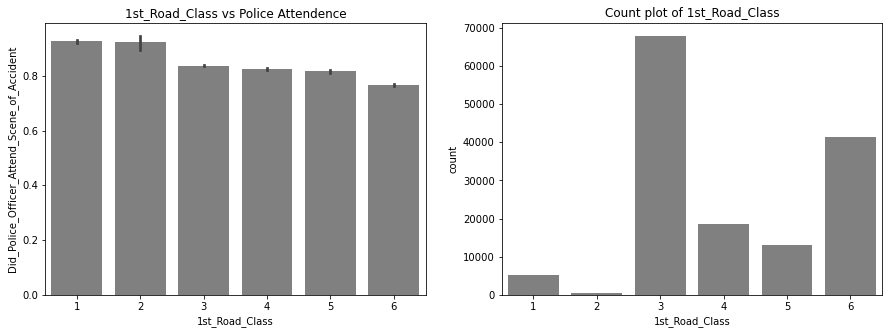

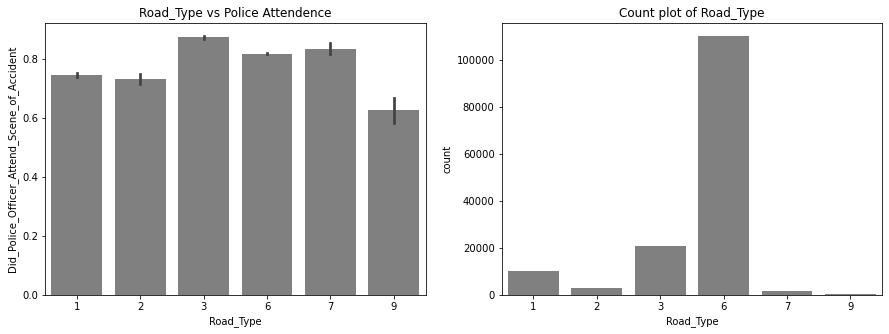

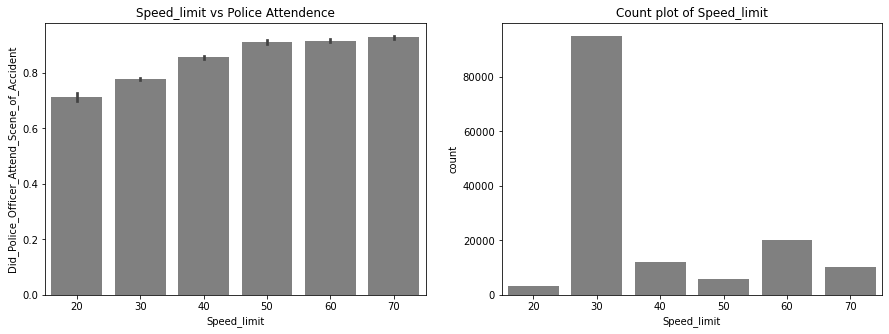

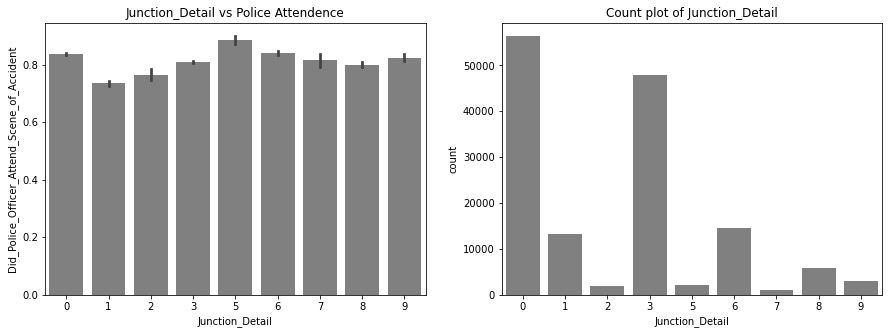

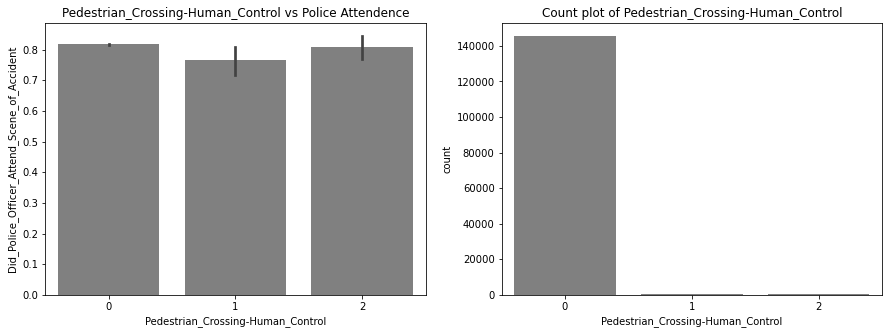

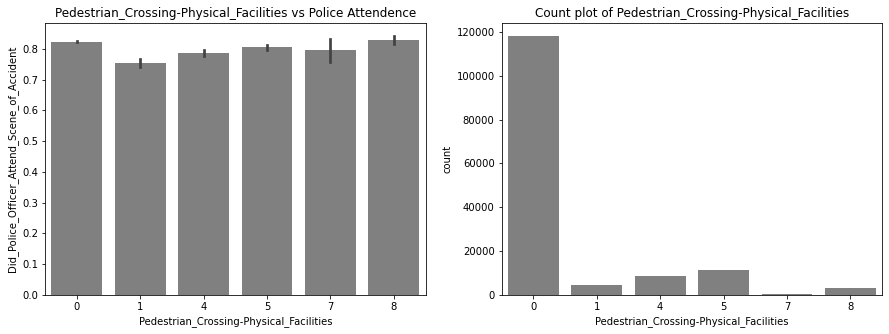

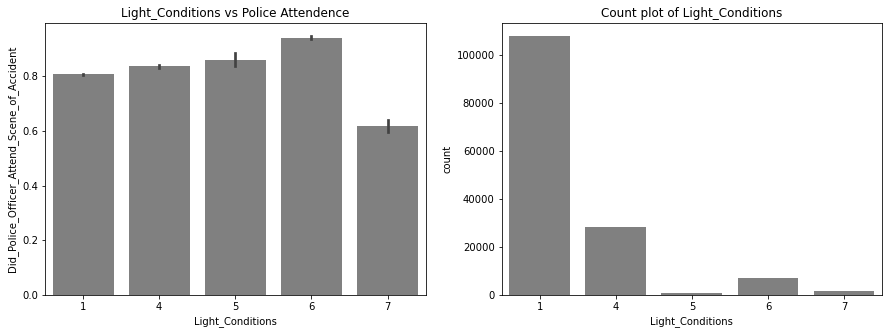

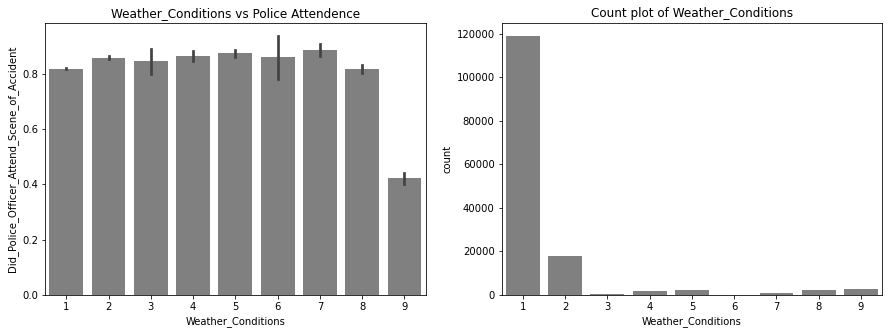

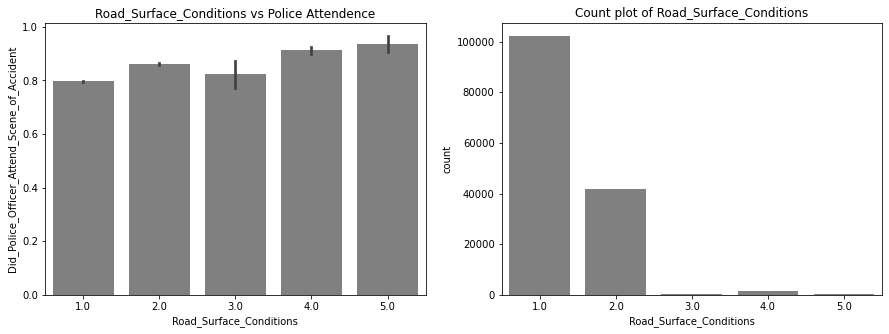

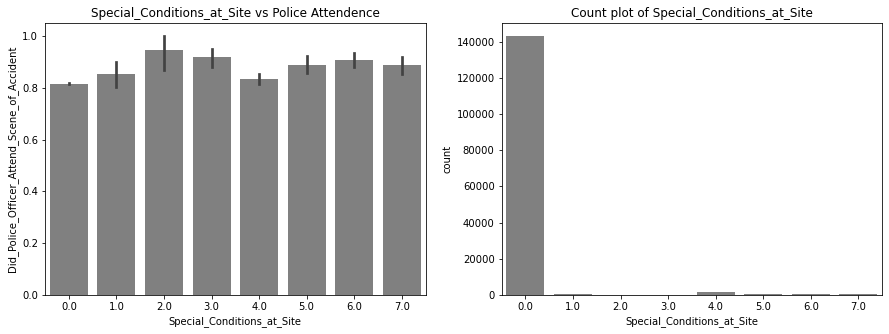

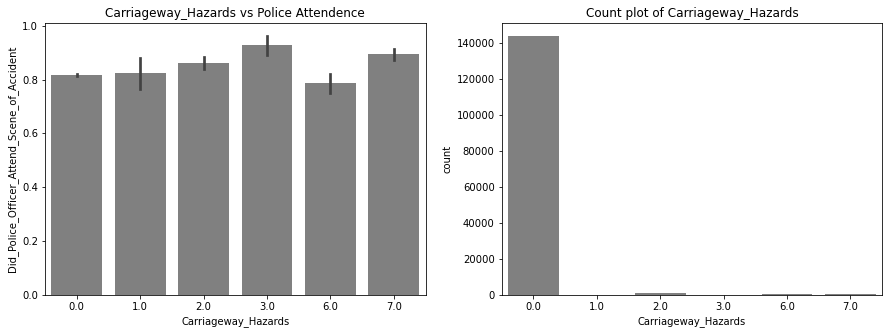

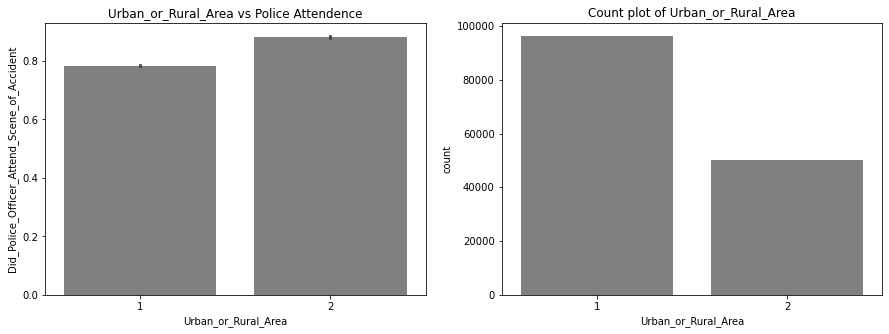

In [729]:
TempColumns = ['Accident_Severity','Number_of_Vehicles','Day_of_Week','1st_Road_Class','Road_Type','Speed_limit','Junction_Detail',
               'Pedestrian_Crossing-Human_Control','Pedestrian_Crossing-Physical_Facilities','Light_Conditions','Weather_Conditions',
               'Road_Surface_Conditions','Special_Conditions_at_Site','Carriageway_Hazards','Urban_or_Rural_Area']
for c in TempColumns:
    f,ax=plt.subplots(1,2,figsize=(15,5))
    sns.barplot(x=c, y=target, data=frame,color="grey", ax=ax[0]).set_title('{} vs Police Attendence'.format(c))
    sns.countplot(c,data=frame,color="grey",ax=ax[1]).set_title('Count plot of {}'.format(c))
    plt.show()

### Insights:
* Feaure 'Police_Force', 'Junction_Detail' are not ordinal -> possible candidates for one hot encoding.
* Accident severity shows an clear correlation to Police Attendence. serious accidents are more likely to be attended. Also Accident_Severity is ordinal. We do not need to one hot encode it.
* Looks like attendence is slightly higher in the weekends. Create a new feature day_type: 1 weekend, 0 weekday.
* Number_of_Vehicles shows an clear correlation to Police Attendence. Also Number_of_Vehicles is ordinal. We do not need to one hot encode it.
* Features Pedestrian_Crossing-Human_Control, Pedestrian_Crossing-Physical_Facilities, Special_Conditions_at_Site and Carriageway_Hazards only have one category over 95%. this makes this features less informative.
* Feature Weather_Conditions looks misleading, as it shows significantly low police attendence rate for 'unknown' category. Learning this has no value when serving. If could add bias to the model.
* Feature Road_Type looks misleading, as it shows significantly low police attendence rate for 'unknown' category. Learning this has no value when serving. If could add bias to the model.
* Rural areas seemed to have higher attendance ratio than urban areas.
* roads with higher speed limit are more likely to bring a police officer.

# Data Cleaning & Feature Engineering

## Summary of actions taken
* Some features seems not informative these needs to be dropped: "Accident_Index","Location_Easting_OSGR", "Location_Northing_OSGR","LSOA_of_Accident_Location".
* Dropping 2nd_Road_Class and Junction_Control due to large missing values.
* filling missing values in  'LSOA_of_Accident_Location','2nd_Road_Number','Road_Surface_Conditions','Special_Conditions_at_Site','Carriageway_Hazards' colimns with mode.
* Extract new features, 'Month','Day','Hour' from Date and Time columns.
* drop "Date" & "Time" features as they are redundent now.
* drop 'Month','Day' as they look not so informative.
* Keep features Accident_Severity,Number_of_Vehicles, 1st_Road_Class as is as they are ordinal in this context.
* Create a new feature day type: 1 weekend, 0 weekday from Day_of_Week. keep it as it is. its ordinal. Drop feature Day_of_Week
* Drop feaures Pedestrian_Crossing-Human_Control, Pedestrian_Crossing-Physical_Facilities, Special_Conditions_at_Site and Carriageway_Hazards as there is only one category visible all the time.
* Onehot encode Features 'Police_Force'
* Replacing their value of columns of very high cardinality with their respective counts, Counts should work quite well with the tree-based model I intend to use. Intution is that this should encode popularity.


## Extract new features, 'Month','Day','Hour' from Date and Time columns.

In [730]:
# In any case lets see the distribution of probbaility to attend and also create some daytime related fields
frame['Month']=[int(d.split('/')[1]) for d in frame.Date]
frame['Day']=[int(d.split('/')[0]) for d in frame.Date]
frame['Hour']=[int(d.split(':')[0]) for d in frame.Time]
#frame[['Date','Month','Day','Hour','Time']].head(5)

           mean  count
Month                 
1      0.809449  12086
2      0.803154  10780
3      0.809484  11915
4      0.821675  11008
5      0.820450  12303
6      0.813597  12532
7      0.819592  13026
8      0.839693  12108
9      0.817360  11832
10     0.821710  13450
11     0.809905  13246
12     0.821868  12036


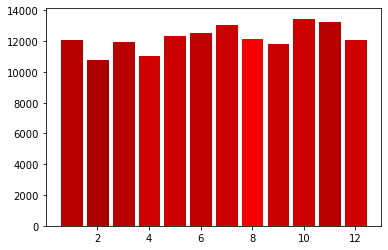

         mean  count
Day                 
1    0.818981   4889
2    0.820280   4507
3    0.804997   4923
4    0.813248   5012
5    0.816469   4724
6    0.815195   4870
7    0.819256   5079
8    0.825256   5076
9    0.809045   4975
10   0.810785   5137
11   0.811640   5017
12   0.816872   4860
13   0.825439   5236
14   0.822800   4921
15   0.808547   4727
16   0.810509   4834
17   0.813594   4914
18   0.818466   4798
19   0.812711   4736
20   0.821915   4627
21   0.821578   4792
22   0.825241   4778
23   0.821828   4563
24   0.817023   5099
25   0.821565   4702
26   0.831737   4386
27   0.821971   4606
28   0.817763   4774
29   0.820703   4183
30   0.810199   4020
31   0.814627   2557


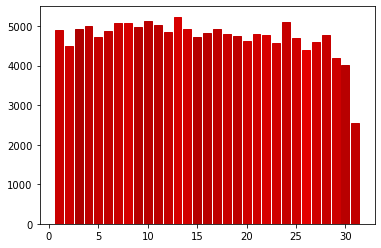

          mean  count
Hour                 
0     0.899256   2015
1     0.888117   1439
2     0.903315   1086
3     0.905640    922
4     0.919753    810
5     0.863777   1292
6     0.839419   2821
7     0.817102   6736
8     0.784762  10723
9     0.816357   7373
10    0.829021   6802
11    0.825478   7850
12    0.808308   8811
13    0.809546   8716
14    0.809465   8833
15    0.787153  11271
16    0.803925  11924
17    0.797133  13324
18    0.800931  10529
19    0.828963   7513
20    0.841997   5348
21    0.850000   4080
22    0.876012   3460
23    0.886914   2644


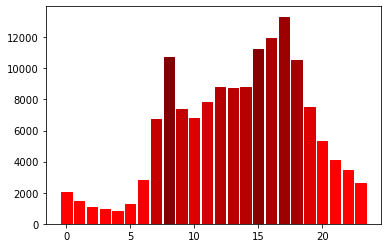

In [731]:
for index,column_name in enumerate(['Month','Day','Hour']): # for each column in the frame
    #print (" field %s  has %d unique values " % (column_name ))
    aggregate_frame=frame[target].groupby(frame[column_name]).agg(['mean', 'count'])
    print(aggregate_frame)
    
    barlist=plt.bar(aggregate_frame.index.values, aggregate_frame['count'].values)
    for i in range (0,len(aggregate_frame.index.values)):
        barlist[i].set_color([max(0,min(1,(aggregate_frame['mean'].iloc[i]-0.72)*8)),max(0,min(1,(1-aggregate_frame['mean'].iloc[i]-0.72)*8)),0.0])
    plt.show()

* Police presense is bigger in later (or very early) hours. -> hour feature is good. It may be related with availability or seriousness of accidents.
* However 'Month' & 'Day' seems not informative.

In [732]:
# drop 'Month','Day'
frame.drop(['Month','Day'],axis=1, inplace=True)

## Create feature day_type (differentiate weekdays and weekends)

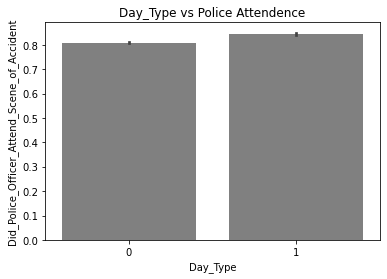

In [733]:
frame['Day_Type']=[0 if (d >1 and d<7) else 1 for d in frame.Day_of_Week]
frame.drop(['Day_of_Week'],axis=1, inplace=True)

sns.barplot(x="Day_Type", y=target, data=frame,color="grey").set_title('Day_Type vs Police Attendence')
plt.show()

## Replacing their value of columns of very high cardinality with their respective counts

In [734]:
columns_many_uniques=["Local_Authority_(District)","Local_Authority_(Highway)","1st_Road_Number","2nd_Road_Number"]

for index,column_name in enumerate(columns_many_uniques): # for each column in the selected list for counts' conversion
        print (column_name)#, len(np.unique(frame[column_name])))    
        counters = frame[column_name].value_counts().to_dict()    
        frame[column_name].replace(counters, inplace=True)    
        
frame[columns_many_uniques].head(5)

Local_Authority_(District)
Local_Authority_(Highway)
1st_Road_Number
2nd_Road_Number


,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Number,2nd_Road_Number
0,712,712,306,115307.0
1,712,712,52,64.0
2,712,712,349,115307.0
3,712,712,38815,115307.0
4,712,712,1388,271.0


## Dropping unwanted features

In [735]:
#dropping fields I will not use
drop_fields=["Accident_Index","Location_Easting_OSGR", "Location_Northing_OSGR","LSOA_of_Accident_Location" ,"Date", "Time",
             'Pedestrian_Crossing-Human_Control', 'Pedestrian_Crossing-Physical_Facilities', 'Special_Conditions_at_Site','Carriageway_Hazards']
print ("before removal: " , frame.shape)
#print(frame.columns.values)
#after
frame.drop(drop_fields,axis=1, inplace=True)
print ("After removal: " , frame.shape)
#separate target 
y= np.array(frame[target].values)
#check
print (np.mean(y), np.sum(y), len(y))
frame.drop(target, axis=1, inplace=True)  
print ("After target removal: " , frame.shape)

before removal:  (146322, 31)
After removal:  (146322, 21)
0.8174232172878992 119607 146322
After target removal:  (146322, 20)


In [736]:
#One Hot Encoding

# looks useless at the moment (we are using a tree based model.) .but this Makes sense
columnsToOneHotEncode = ['Police_Force']

frame = pd.get_dummies(frame,columns= columnsToOneHotEncode)
frame.head()

,Longitude,Latitude,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,2nd_Road_Number,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Hour,Day_Type,Police_Force_1,Police_Force_3,Police_Force_4,Police_Force_5,Police_Force_6,Police_Force_7,Police_Force_10,Police_Force_11,Police_Force_12,Police_Force_13,Police_Force_14,Police_Force_16,Police_Force_17,Police_Force_20,Police_Force_21,Police_Force_22,Police_Force_23,Police_Force_30,Police_Force_31,Police_Force_32,Police_Force_33,Police_Force_34,Police_Force_35,Police_Force_36,Police_Force_37,Police_Force_40,Police_Force_41,Police_Force_42,Police_Force_43,Police_Force_44,Police_Force_45,Police_Force_46,Police_Force_47,Police_Force_48,Police_Force_50,Police_Force_52,Police_Force_53,Police_Force_54,Police_Force_55,Police_Force_60,Police_Force_61,Police_Force_62,Police_Force_63,Police_Force_91,Police_Force_92,Police_Force_93,Police_Force_94,Police_Force_95,Police_Force_96,Police_Force_97,Police_Force_98
0,-0.206443,51.496345,3,2,1,712,712,3,306,6,30,0,115307.0,1,2,2.0,1,13,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,-0.189713,51.489523,3,2,1,712,712,3,52,6,30,5,64.0,7,1,1.0,1,23,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,-0.173827,51.490536,3,2,1,712,712,3,349,6,30,3,115307.0,1,1,1.0,1,10,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,-0.192311,51.496668,3,1,1,712,712,5,38815,6,30,3,115307.0,4,1,1.0,1,17,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,-0.171308,51.495892,3,2,1,712,712,3,1388,6,30,7,271.0,1,1,1.0,1,8,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Data Partitioning

In [737]:
from sklearn.model_selection import train_test_split
X, X_test, Y, Y_test = train_test_split(frame, y, test_size=0.25, random_state=42, stratify=y)
print (X.shape, Y.shape)
print (X_test.shape, Y_test.shape)

(109741, 70) (109741,)
(36581, 70) (36581,)


# Model Selection, Model Training and Hyperparameter Tunning


## The Validation Approach
* 75% of the data was kept for training and 25% for test. The split was random but stratified ensuring the target variable is split proportionally.
* The cross-validation process is a 4-fold (75-25) on the training data. (to speed up the things). Based on experience this has worked well in similar problems
* Although data is timestamped, EDA did not show strong time series components. Both month and day seemed uninformative. so k fold CV makes sense.
* kfold cross validation is used here with grid search to tune hyper paramters of the model.



## Selection of Performance Metric
* Performance metric should be chosen depending on our purpose of task. for example, 
  * Precison when the cost of a false positive is high
  * Recall when the cost of a false negative is high
  * F1 Score when true negatives don’t matter much.
* However here the purpose is not very clear and also this is not a class imbalenced problem. Hence accuracy would be fine.
* As a generic measure of how our model is we will be using ROC AUC too.


## Selection of Algorithm
* RandomForestClassifier choosen due to few reasons,
  * I have a good undertanding of how the algorithm work.
  * Encode non linearities well.
  * For many data sets, it works well.
  * It can handle higher dimentional data.
  * It gives feature importances easily.

In [744]:
# model training and hyperparameter tuning
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,make_scorer,roc_auc_score

RFC=RandomForestClassifier(criterion='entropy',random_state=42)

# define the search space.
param_grid = {
    'bootstrap': [True],
    'max_depth': [10,15,17],
    'max_features': ['auto'],
    'min_samples_leaf': [50, 100],
    'min_samples_split': [50, 100],
    'n_estimators': [100]}

# make scorer
accuracy = make_scorer(accuracy_score)
model = GridSearchCV(estimator=RFC, param_grid = param_grid, n_jobs=-1, cv=4, scoring=accuracy, verbose=2)
model.fit(X, Y)

print('Random forest regression...')
print('Best Params:', model.best_params_)
print('Best CV Score:', model.best_score_)

best_params = model.best_params_

Fitting 4 folds for each of 12 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:  3.9min finished


Random forest regression...
Best Params: {'bootstrap': True, 'max_depth': 15, 'max_features': 'auto', 'min_samples_leaf': 50, 'min_samples_split': 50, 'n_estimators': 100}
Best CV Score: 0.8203679614712057


In [745]:
cv_results = pd.DataFrame(model.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,16.249459,0.118346,0.439124,0.011616,True,10,auto,50,50,100,"{'bootstrap': True, 'max_depth': 10, 'max_feat...",0.818487,0.819610,0.818808,0.818954,0.818965,0.000409,9
1,16.155662,0.033260,0.465406,0.018013,True,10,auto,50,100,100,"{'bootstrap': True, 'max_depth': 10, 'max_feat...",0.818487,0.819610,0.818808,0.818954,0.818965,0.000409,9
2,15.364967,0.153526,0.424152,0.014494,True,10,auto,100,50,100,"{'bootstrap': True, 'max_depth': 10, 'max_feat...",0.818268,0.818626,0.818188,0.819428,0.818627,0.000491,11
3,16.047951,0.214535,0.436852,0.003654,True,10,auto,100,100,100,"{'bootstrap': True, 'max_depth': 10, 'max_feat...",0.818268,0.818626,0.818188,0.819428,0.818627,0.000491,11
4,20.661607,0.020562,0.583517,0.010431,True,15,auto,50,50,100,"{'bootstrap': True, 'max_depth': 15, 'max_feat...",0.819908,0.820922,0.820047,0.820594,0.820368,0.000410,1
5,20.925279,0.078545,0.642745,0.018327,True,15,auto,50,100,100,"{'bootstrap': True, 'max_depth': 15, 'max_feat...",0.819908,0.820922,0.820047,0.820594,0.820368,0.000410,1
6,19.574380,0.347991,0.591099,0.029078,True,15,auto,100,50,100,"{'bootstrap': True, 'max_depth': 15, 'max_feat...",0.818851,0.818954,0.818808,0.819610,0.819056,0.000324,7
7,18.814849,0.226299,0.509807,0.020391,True,15,auto,100,100,100,"{'bootstrap': True, 'max_depth': 15, 'max_feat...",0.818851,0.818954,0.818808,0.819610,0.819056,0.000324,7
8,21.747041,0.070818,0.673440,0.019942,True,17,auto,50,50,100,"{'bootstrap': True, 'max_depth': 17, 'max_feat...",0.820127,0.820776,0.819756,0.820448,0.820277,0.000378,3
9,22.641721,0.117422,0.668090,0.014046,True,17,auto,50,100,100,"{'bootstrap': True, 'max_depth': 17, 'max_feat...",0.820127,0.820776,0.819756,0.820448,0.820277,0.000378,3


# Final Model, Confusion Matrix & AUC curve

In [746]:
print ("========== Do the final model =========")

model=RandomForestClassifier(bootstrap=True, max_depth=15, max_features='auto',min_samples_leaf=50, min_samples_split=50, n_estimators=100)

model.fit(X,Y) #fit gbm model
preds=model.predict_proba(X_test)[:,1] # retrieve probability for policeman to arrive
classification=model.predict(X_test) # predict a hard '1' or '0'

auc=roc_auc_score(Y_test,preds) # estimate auc for test
cl=accuracy_score(Y_test,classification) # estimate classification for test

print ("size train: %d size test: %d auc/accuracy  %f/%f" % ( (X.shape[0]), (X_test.shape[0]), auc,cl))

========== Do the final model =========
size train: 109741 size test: 36581 auc/accuracy  0.744272/0.821109


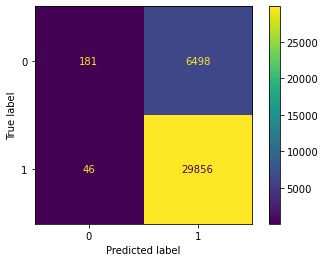

In [747]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, X_test, Y_test, values_format='d')
plt.show()

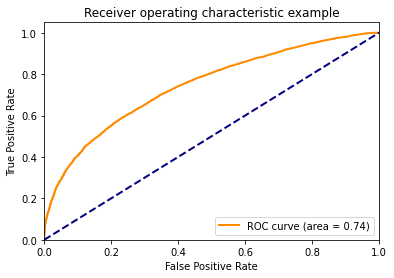

In [748]:
from sklearn.metrics import roc_curve
#retriece sensitivity and specificity to plot the roc curve

fpr, tpr, _ = roc_curve(Y_test, preds)


plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# Feature importances

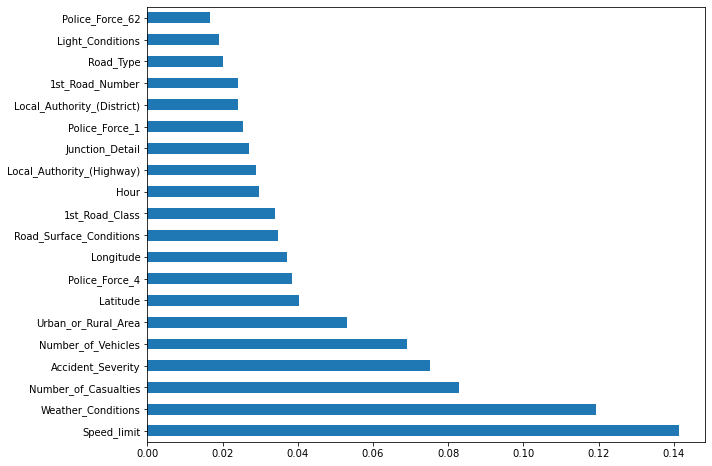

In [749]:
# feat_importances
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh',figsize=(10,8))

# If I had more time/resources
* This report lack a Machine Learning problem framing step that should come first, which describes the task we are going to solve.
* Try other models Ex: MLPClassifier, XGBoost, CatBoost (we have a lot of categorical features here.)
* Try other non tree based models.
* Trying more hyperparameters.
* Binning longitude and latitude and crossing them.
* Might not drop those features due to missing values, would look deeper.
* Separate : hour -> early morning, day, night
* Analyse impact on crossed features to  the target. Example Day & Hour on target.
* try upsampling minority class, or downsampling majority.
* Consider encoding other non ordinal categorical features using OneHot encoding.
* Deal with the possible bias introduced by feature wheather_conditions and road_type by reporting a low attendence rate for 'Unknown' category
* Replace police_force by there score (let's score them by their historical average of attending a incident)

# How useful is the model from a practical point of view?
* Exact usage/purpose of this model is not clearly given. Let's assume this model will be used to 
* To a  model to be useful we should have the same in training time as the serving time.
* And features used in training should be easily accessible immediately when the accident is reported to feed it to the prediction model.
* For an example, Number_of_Casualties might not be availble immediately.
* Too much features, means we need a very detailed incident report immediately after accident to feed this to the model. so this is impracticle. As a remedy we can include only the most important features.
